In [ ]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### EDA

In [ ]:
# prompt: read dataset into pandas dataframe from this path    /content/drive/MyDrive/Research on BD NYU /development/Kaggle_BD /bipolar_dataset.csv
file_path = '/content/drive/MyDrive/Research on BD NYU /development/Kaggle_BD /bipolar_dataset.csv'
import pandas as pd
df = pd.read_csv(file_path,encoding='latin1', delimiter=';')
print(df.head())


       subreddit            author        date  \
0  bipolarreddit   TanagerOffTrack  01/01/2018   
1  bipolarreddit  DuplicitousSnake  01/01/2018   
2  bipolarreddit       dearangelou  01/01/2018   
3  bipolarreddit      dootdoopdooq  01/01/2018   
4  bipolarreddit      lemonyellow3  01/01/2018   

                                                post  \
0  What birth control are you on? I tried an IUD ...   
1  Hypersexuality I was diagnosed with bipolar un...   
2  Meditation I have been using the free meditati...   
3  Family question diagnosis - vent Start with th...   
4  Unable to stop talking to myself- any ideas/ex...   

  automated_readability_index coleman_liau_index flesch_kincaid_grade_level  \
0                 1,02695E+16        3,51772E+16                3,31905E+14   
1                 6,12041E+15        5,77249E+16                7,65747E+15   
2                    18515625        4,57143E+16                4,12375E+15   
3                  7,6667E+15        3,18105E+

In [ ]:
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text
df['post'] = df['post'].apply(clean_text)
print(df['post'].head())

0    what birth control are you on i tried an iud b...
1    hypersexuality i was diagnosed with bipolar un...
2    meditation i have been using the free meditati...
3    family question diagnosis  vent start with the...
4    unable to stop talking to myself any ideasexpe...
Name: post, dtype: object


In [ ]:
import pandas as pd

# Define columns that should NOT be converted (e.g., 'post')
text_columns = ['post']  # Add other text-based columns if necessary

# Loop through object columns, skipping those in text_columns
for col in df.select_dtypes(include=['object']).columns:
    if col not in text_columns:
        df[col] = df[col].str.replace(',', '.', regex=True)  # Replace commas with periods
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, set errors to NaN

# Print to check if conversion was successful
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Columns: 350 entries, subreddit to tfidf_year
dtypes: float64(272), int64(77), object(1)
memory usage: 4.5+ MB
None
   subreddit  author  date                                               post  \
0        NaN     NaN   NaN  what birth control are you on i tried an iud b...   
1        NaN     NaN   NaN  hypersexuality i was diagnosed with bipolar un...   
2        NaN     NaN   NaN  meditation i have been using the free meditati...   
3        NaN     NaN   NaN  family question diagnosis  vent start with the...   
4        NaN     NaN   NaN  unable to stop talking to myself any ideasexpe...   

   automated_readability_index  coleman_liau_index  \
0                 1.026950e+16        3.517720e+16   
1                 6.120410e+15        5.772490e+16   
2                 1.851562e+07        4.571430e+16   
3                 7.666700e+15        3.181050e+15   
4                 3.663080e+16        6.748000e+15   

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Apply MinMax scaling only to numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Print to check if scaling was successful
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Columns: 350 entries, subreddit to tfidf_year
dtypes: float64(349), object(1)
memory usage: 4.5+ MB
None
   subreddit  author  date                                               post  \
0        NaN     NaN   NaN  what birth control are you on i tried an iud b...   
1        NaN     NaN   NaN  hypersexuality i was diagnosed with bipolar un...   
2        NaN     NaN   NaN  meditation i have been using the free meditati...   
3        NaN     NaN   NaN  family question diagnosis  vent start with the...   
4        NaN     NaN   NaN  unable to stop talking to myself any ideasexpe...   

   automated_readability_index  coleman_liau_index  \
0                     0.389399            0.594853   
1                     0.352558            0.798839   
2                     0.298211            0.690180   
3                     0.366288            0.305387   
4                     0.623474            0.337657   

   flesch

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
# Check for missing or non-string values in the 'post' column
print(df['post'].isnull().sum())  # Count of missing values
print(df['post'].apply(lambda x: isinstance(x, str)).value_counts())  # Check if all values are strings

0
post
True    1692
Name: count, dtype: int64


In [ ]:
# Fill missing values with an empty string
df['post'] =df['post'].fillna('')

# Ensure all values are strings
df['post'] = df['post'].astype(str)

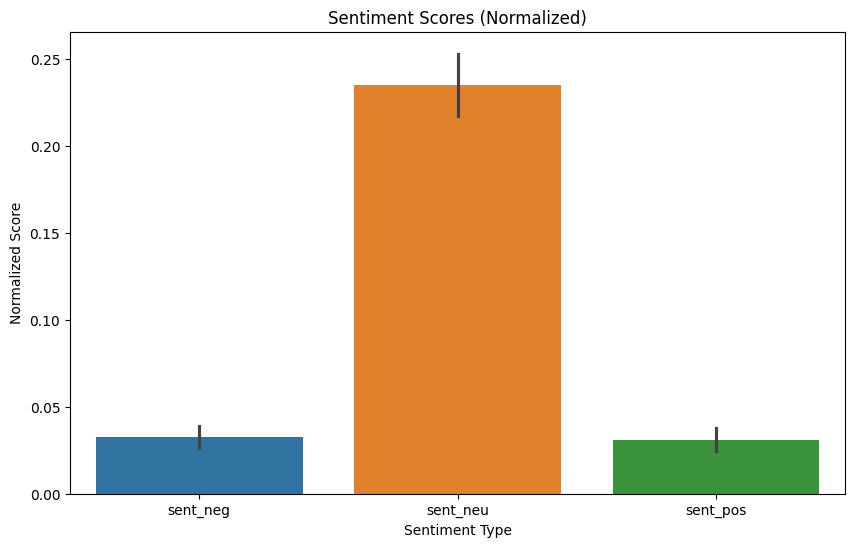

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df[['sent_neg', 'sent_neu', 'sent_pos']])
plt.title('Sentiment Scores (Normalized)')
plt.xlabel('Sentiment Type')
plt.ylabel('Normalized Score')
plt.show()

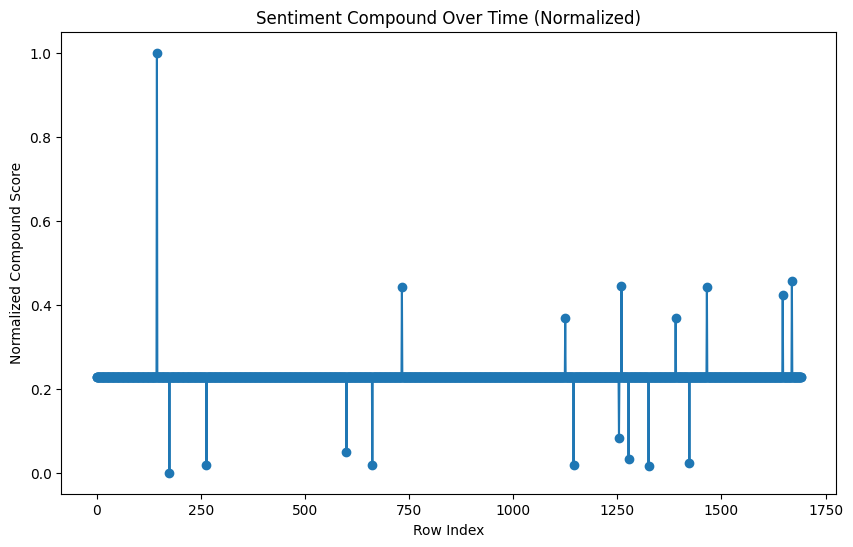

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df['sent_compound'], marker='o')
plt.title('Sentiment Compound Over Time (Normalized)')
plt.xlabel('Row Index')
plt.ylabel('Normalized Compound Score')
plt.show()


	•	The majority of the sentiment scores hover around a baseline, suggesting that most texts have a neutral to slightly positive sentiment.
	•	There are a few spikes indicating particularly strong positive or negative sentiments at specific points.

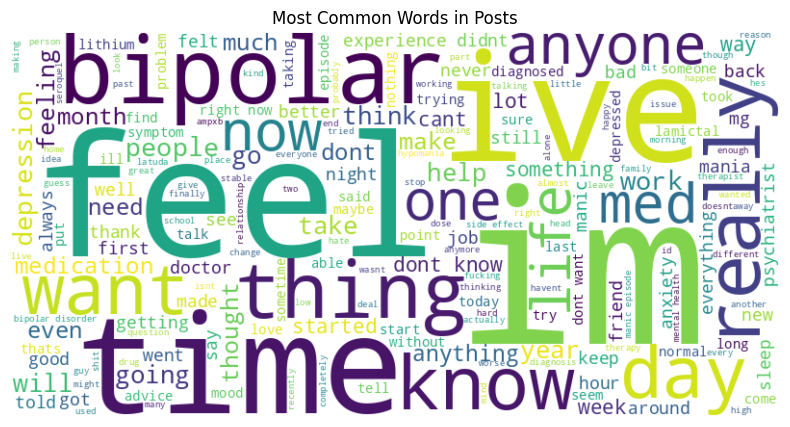

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Cloud for posts
text = " ".join(df['post'].dropna())  # Combine all posts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Posts")
plt.show()

#### Create labels using KMeans

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch
import numpy as np

# Initialize BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a list of texts
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        # Tokenize the text
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Extract embeddings (use the output from the last layer)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(embeddings)

# Get BERT embeddings for the text data
embeddings = get_bert_embeddings(df['post'])

# Perform KMeans clustering
num_clusters = 3  # Adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

# Print the predicted cluster labels for each text
print("Cluster labels:", kmeans.labels_)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Cluster labels: [0 1 2 ... 0 1 0]


In [ ]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

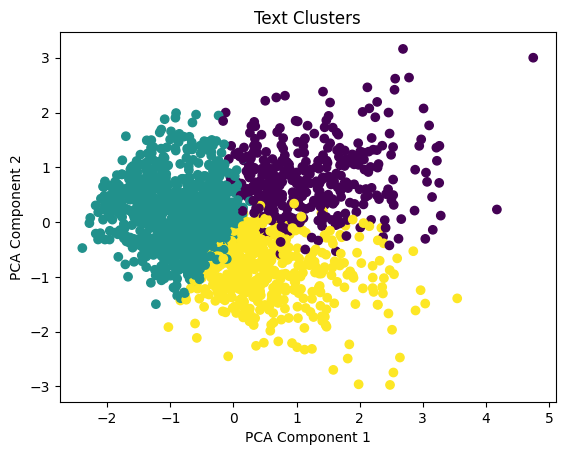

In [ ]:
# Plot the clusters
import matplotlib.pyplot as plt
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Text Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
# prompt: how do I count number of 0s, 1s, 2s in kmeeans,labels_

from collections import Counter

# Assuming 'kmeans.labels_' is your array of cluster labels
label_counts = Counter(kmeans.labels_)

# Print the counts for each label
for label, count in label_counts.items():
    print(f"Number of data points in cluster {label}: {count}")


Number of data points in cluster 0: 374
Number of data points in cluster 1: 855
Number of data points in cluster 2: 463


In [ ]:
# Assign cluster labels to a new column in the DataFrame
df['cluster'] = kmeans.labels_

for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    print(df[df['cluster'] == cluster_id]['post'].sample(10).tolist())  # Print 10 random texts
    print("\n")

Cluster 0:
['lamictal  issues since raising dosage hi all first post here\n\nampxb\n\nso ive been on lamictal for about  months and havent had any issues ive had it slowly raised from mg to  mg last week since ive raised from  mg to mg im seeing a massive increase in being disoriented vision being fuzzy unable to think straight like type at work or write and last night i experienced a large amount of paranoia i havent felt since before i went on the medication does this sound like  mg might be too much for me and i should go back down to  mg\n\nampxb\n\nthanks all', 'bipolar amp handling work what do you do for a living\nhow do you manage your stress and triggers to avoid maniadepression\n\nhave you ever had to leave a position because it had negative effects on your mental health', 'schizoaffective vs bipolar  i was diagnosed bipolar  when i had my first psychotic break but how do i know i dont have schizoaffective disorder ', 'if none of the bipolarantidepressantantipsychoticantiseiz

<ipython-input-15-e214b7869a0e>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = kmeans.labels_


In [ ]:
from collections import Counter
import numpy as np

df['cluster'] = kmeans.labels_

for cluster_id in range(num_clusters):
    cluster_texts = df[df['cluster'] == cluster_id]['post'].tolist()
    all_words = " ".join(cluster_texts).split()  # Split all words
    most_common_words = Counter(all_words).most_common(20)  # Get top 20 words
    print(f"Cluster {cluster_id} - Common Words: {most_common_words}")

Cluster 0 - Common Words: [('i', 1317), ('and', 913), ('to', 809), ('the', 746), ('a', 641), ('my', 567), ('of', 508), ('it', 477), ('for', 419), ('on', 385), ('im', 382), ('have', 360), ('is', 330), ('in', 306), ('with', 294), ('this', 292), ('but', 290), ('me', 259), ('that', 256), ('been', 222)]
Cluster 1 - Common Words: [('i', 13529), ('and', 8049), ('to', 7483), ('the', 5823), ('a', 5613), ('my', 5362), ('of', 4039), ('it', 2975), ('that', 2846), ('in', 2739), ('im', 2665), ('me', 2621), ('was', 2418), ('for', 2395), ('but', 2356), ('is', 2199), ('have', 2167), ('this', 2099), ('with', 1994), ('so', 1814)]
Cluster 2 - Common Words: [('i', 1638), ('to', 1052), ('and', 921), ('the', 755), ('a', 719), ('my', 552), ('of', 512), ('it', 487), ('im', 435), ('you', 373), ('is', 371), ('for', 358), ('in', 349), ('this', 329), ('that', 325), ('but', 306), ('me', 297), ('have', 295), ('just', 288), ('with', 251)]


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

analyzer = SentimentIntensityAnalyzer()
df['cluster'] = kmeans.labels_

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # Compound score (-1 to +1)

# Compute average sentiment per cluster
for cluster_id in range(3):
    cluster_texts = df[df['cluster'] == cluster_id]['post'].tolist()
    sentiments = [get_sentiment(text) for text in cluster_texts]
    avg_sentiment = np.mean(sentiments)
    print(f"Cluster {cluster_id} - Avg Sentiment: {avg_sentiment}")

Cluster 0 - Avg Sentiment: -0.0730764705882353
Cluster 1 - Avg Sentiment: -0.23427356725146198
Cluster 2 - Avg Sentiment: 0.019530453563714904


Cluster Label Assignments:
	•	Cluster 0 → Euthymia (neutral state)
	•	Sentiment: -0.073 (closest to neutral)
	•	Topic: Discusses medical marijuana and mental health in a balanced way.
	•	Conclusion: This seems like a general discussion rather than a strong depressive or manic expression.
	•	Cluster 1 → Depression
	•	Sentiment: -0.234 (most negative)
	•	Topic: Expressing distress about a bipolar son and personal struggles.
	•	Conclusion: The negative sentiment and themes of struggle indicate depression.
	•	Cluster 2 → Mania
	•	Sentiment: 0.019 (slightly positive)
	•	Topic: Overwhelmed thoughts, repeated “I”, impulsive tone.
	•	Conclusion: The presence of many “I” statements and fast-paced speech pattern align with manic episodes.

In [ ]:
cluster_sentiment_map = {
    0: "euthymia",
    1: "depression",
    2: "mania"
}

# Map cluster labels to sentiment categories
df['sentiment_category'] = df['cluster'].map(cluster_sentiment_map)

# Now you can use the 'sentiment_category' column in your DataFrame
print(df[['cluster', 'sentiment_category']])


      cluster sentiment_category
0           0           euthymia
1           1         depression
2           2              mania
3           1         depression
4           2              mania
...       ...                ...
1687        1         depression
1688        2              mania
1689        0           euthymia
1690        1         depression
1691        0           euthymia

[1692 rows x 2 columns]


<ipython-input-19-b6a05fe61c90>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sentiment_category'] = df['cluster'].map(cluster_sentiment_map)


#### BERT-based text classification

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
from datasets import Dataset


# Encode labels to numbers
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment_category'])  # Converts categories to numbers

# Train-test split (80% training, 20% validation)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['post'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

<ipython-input-21-137d0a5b8b8b>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['label'] = label_encoder.fit_transform(df['sentiment_category'])  # Converts categories to numbers


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Tokenize function
def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512)

# Apply tokenization
train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class MentalHealthDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Create dataset objects
train_dataset = MentalHealthDataset(train_encodings, train_labels)
val_dataset = MentalHealthDataset(val_encodings, val_labels)

In [ ]:
from transformers import BertForSequenceClassification, DistilBertForSequenceClassification, DistilBertTokenizer # Import BertForSequenceClassification

num_labels = len(label_encoder.classes_)  # Should be 3 (euthymia, mania, depression)
print(num_labels)
model = DistilBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

3


You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'distilbert.embeddings.LayerNorm.bias', 'distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.position_embeddings.weight', 'distilbert.embeddings.word_embeddings.weight', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    # Remove or comment out 'evaluation_strategy', 'save_strategy', 'logging_dir', 'logging_steps', and 'save_total_limit'
    # evaluation_strategy="epoch",
    # save_strategy="epoch",
    per_device_train_batch_size=1,  # Reduce batch size
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    weight_decay=0.01,
    gradient_accumulation_steps=8,  # Simulates a larger batch size
    # logging_dir="./logs",
    # logging_steps=10,
    fp16=False,  # Turn off mixed precision for CPU
    # save_total_limit=1,  # Avoid saving too many checkpoints
    #report_to='none' # Turn off reporting to avoid warnings
)

In [ ]:
import gc
import torch

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

gc.collect()  # Clear memory
trainer.train()  # Start training

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: bhojranisoopal (bhojranisoopal-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.586800


TrainOutput(global_step=507, training_loss=0.5856039829743214, metrics={'train_runtime': 536.1289, 'train_samples_per_second': 7.571, 'train_steps_per_second': 0.946, 'total_flos': 1063504434456576.0, 'train_loss': 0.5856039829743214, 'epoch': 2.9874353288987434})

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Get predictions
predictions = trainer.predict(val_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), dim=-1).numpy()

# Calculate accuracy
accuracy = accuracy_score(val_labels, preds)
print(f"Accuracy: {accuracy:.4f}")

# Show detailed classification report
print(classification_report(val_labels, preds, target_names=label_encoder.classes_))

Accuracy: 0.7080
              precision    recall  f1-score   support

  depression       0.90      0.91      0.91       175
    euthymia       0.17      0.01      0.02        79
       mania       0.51      0.93      0.66        85

    accuracy                           0.71       339
   macro avg       0.53      0.62      0.53       339
weighted avg       0.63      0.71      0.64       339



#### Fine tuning results

Since Mania class had lower precision. Using class weights (weighted loss) to try to fix the issue.

In [ ]:
# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=5,  # Increase for better fine-tuning
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=100,
#     weight_decay=0.01,  # Prevent overfitting
#     logging_dir='./logs',
#     logging_steps=10,
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=2e-5,  # Reduce LR for fine-tuning (default 5e-5)
#     load_best_model_at_end=True,  # Ensure best model is saved
# )

trainer.train()


Step,Training Loss
500,0.452700


TrainOutput(global_step=507, training_loss=0.4514705927884555, metrics={'train_runtime': 436.6336, 'train_samples_per_second': 9.296, 'train_steps_per_second': 1.161, 'total_flos': 1063504434456576.0, 'train_loss': 0.4514705927884555, 'epoch': 2.9874353288987434})

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import torch

labels = ["depression", "euthymia", "mania"]
y_train = df['label']  # Assuming df['label'] contains class indices

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float)

# Pass weights to the loss function
from transformers import Trainer
from torch import nn

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None): # Added num_items_in_batch=None
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

<ipython-input-33-7b8301d8e17c>:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


In [ ]:
trainer.train()

Step,Training Loss
500,0.398500


TrainOutput(global_step=507, training_loss=0.39679090981417625, metrics={'train_runtime': 436.2212, 'train_samples_per_second': 9.305, 'train_steps_per_second': 1.162, 'total_flos': 1063504434456576.0, 'train_loss': 0.39679090981417625, 'epoch': 2.9874353288987434})

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Get predictions
predictions = trainer.predict(val_dataset)
preds = np.argmax(predictions.predictions, axis=-1)  # Convert logits to class labels

# Access true labels correctly
true_labels = [val_dataset[i]['labels'].item() for i in range(len(val_dataset))]

# Compute accuracy
accuracy = accuracy_score(true_labels, preds)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(true_labels, preds, target_names=labels)
print(report)

Accuracy: 0.7080
              precision    recall  f1-score   support

  depression       0.93      0.86      0.90       175
    euthymia       0.36      0.15      0.21        79
       mania       0.53      0.91      0.67        85

    accuracy                           0.71       339
   macro avg       0.61      0.64      0.59       339
weighted avg       0.70      0.71      0.68       339



### Trying Roberta

In [ ]:
!pip install transformers datasets

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)  # 3 classes

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

# Create a DatasetDict from your existing train_dataset and val_dataset
from datasets import DatasetDict
dataset = DatasetDict({
    "train": Dataset.from_dict({"text": train_texts, "label": train_labels}),
    "test": Dataset.from_dict({"text": val_texts, "label": val_labels})
})

# Now you can map the tokenize_function
train_dataset = dataset["train"].map(tokenize_function, batched=True)
eval_dataset = dataset["test"].map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
eval_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/1353 [00:00<?, ? examples/s]

Map:   0%|          | 0/339 [00:00<?, ? examples/s]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# Define class labels (adjust according to your dataset)
labels = ["depression", "euthymia", "mania"]
# Convert y_train to a NumPy array to work with np.unique
y_train = np.array(train_dataset["label"])

# Compute balanced class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float)

In [ ]:
from transformers import Trainer
from torch import nn

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None): # Added num_items_in_batch=None
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=class_weights.to(logits.device))  # Apply class weights
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [ ]:
from transformers import TrainingArguments

# training_args = TrainingArguments(
#     output_dir="./results_roberta",
#     num_train_epochs=5,  # More epochs may help
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=100,
#     weight_decay=0.01,
#     logging_dir="./logs_roberta",
#     logging_steps=10,
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=2e-5,
#     load_best_model_at_end=True,
# )

In [ ]:
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
)

<ipython-input-44-4d1320c5e987>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


In [ ]:
trainer.train()

Step,Training Loss
500,0.431000


TrainOutput(global_step=507, training_loss=0.4299879431489422, metrics={'train_runtime': 443.9725, 'train_samples_per_second': 9.142, 'train_steps_per_second': 1.142, 'total_flos': 1063504434456576.0, 'train_loss': 0.4299879431489422, 'epoch': 2.9874353288987434})

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Get predictions
predictions = trainer.predict(eval_dataset)
preds = np.argmax(predictions.predictions, axis=-1)  # Convert logits to class labels
true_labels = eval_dataset["label"]

# Compute accuracy
accuracy = accuracy_score(true_labels, preds)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(true_labels, preds, target_names=labels)
print(report)

Accuracy: 0.9174
              precision    recall  f1-score   support

  depression       0.99      0.93      0.96       175
    euthymia       0.85      0.95      0.90        79
       mania       0.85      0.87      0.86        85

    accuracy                           0.92       339
   macro avg       0.90      0.92      0.90       339
weighted avg       0.92      0.92      0.92       339



In [71]:
# Convert eval_dataset (datasets.Dataset type) to pandas DataFrame
eval_df = eval_dataset.to_pandas()

# Convert val_dataset (custom MentalHealthDataset type) to pandas DataFrame
val_df = pd.DataFrame({
    "text": train_texts,  # Text data from your train_texts list
    "label": train_labels  # Corresponding labels from train_labels list
})

# Concatenate the DataFrames
combined_df = pd.concat([val_df, eval_df], ignore_index=True)

# Instead of calling read_csv on combined_df, directly use combined_df for preprocessing
# Assuming your preprocess_reddit function operates on a DataFrame, you can modify it or
# create a new function that accepts a DataFrame as input
# Define or import the preprocess_reddit_from_df function here
# Example:
import json
import numpy as np  # Import numpy

def preprocess_reddit_from_df(df):
    """
    This is a placeholder function.
    Replace with your actual preprocessing logic for the combined DataFrame.
    """
    # Example: convert DataFrame to a list of dictionaries
    processed_data = df.to_dict(orient='records')

    # Convert ndarray to list for JSON serialization
    for item in processed_data:
        for key, value in item.items():
            if isinstance(value, np.ndarray):
                item[key] = value.tolist()  # Convert ndarray to list

    return processed_data

processed_data = preprocess_reddit_from_df(combined_df)  # Assuming you create a preprocess_reddit_from_df function


# CORRECTED PATH (no extra space)
output_path = "/content/drive/MyDrive/Research on BD NYU/development/Kaggle_BD/processed_reddit_combined.json"
with open(output_path, "w") as f:
    json.dump(processed_data, f, indent=2)

print("Saved combined data to:", output_path)

Saved combined data to: /content/drive/MyDrive/Research on BD NYU/development/Kaggle_BD/processed_reddit_combined.json


In [ ]:
import os

# Define the folder path and file path
dir_path = "/content/drive/MyDrive/Research on BD NYU/development/Kaggle_BD"
file_path = os.path.join(dir_path, "processed_reddit_combined.json")

# Create the directory if it doesn't exist
os.makedirs(dir_path, exist_ok=True)

# Save JSON file
with open(file_path, "w") as f:
    json.dump(processed_data, f, indent=2)

print("Saved combined data to:", file_path)

Saved combined data to: /content/drive/MyDrive/Research on BD NYU/development/Kaggle_BD/processed_reddit_combined.json
